#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
print("hi")

hi


In [ ]:
## Reading the image plaksha_Faculty.jpg?
img = cv2.imread(r"C:\Users\hp\Desktop\Plaksha_Faculty.jpg")
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
## Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better
#  detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 


In [5]:
# Define the text and font parameters
text = "face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX   ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0,0,250) ## Text color in BGR format (here, it's red)
font_thickness = 1 ## Thickness of the text

In [6]:
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    

In [7]:
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Total number of face detected are", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

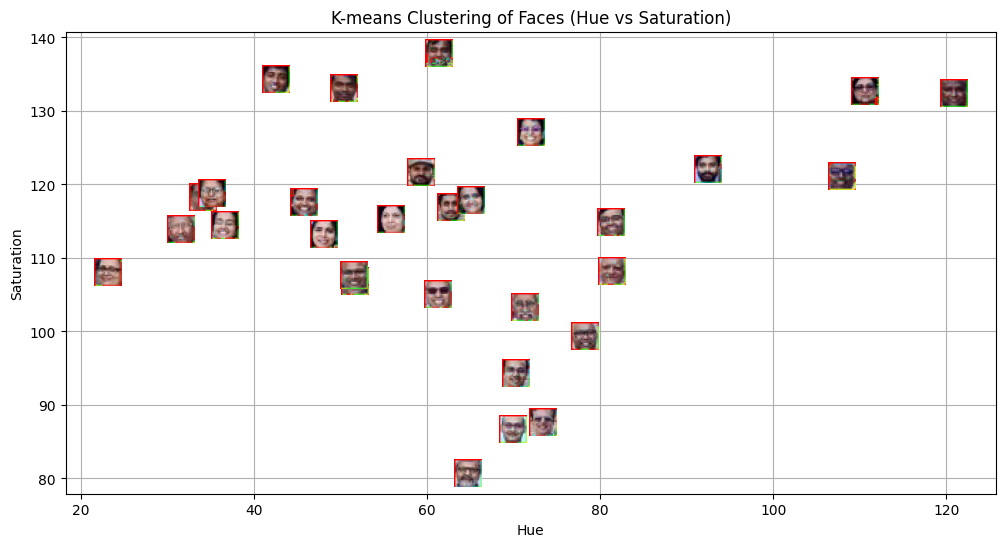

In [8]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init = 10).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("K-means Clustering of Faces (Hue vs Saturation)")
plt.grid(True)
plt.show()

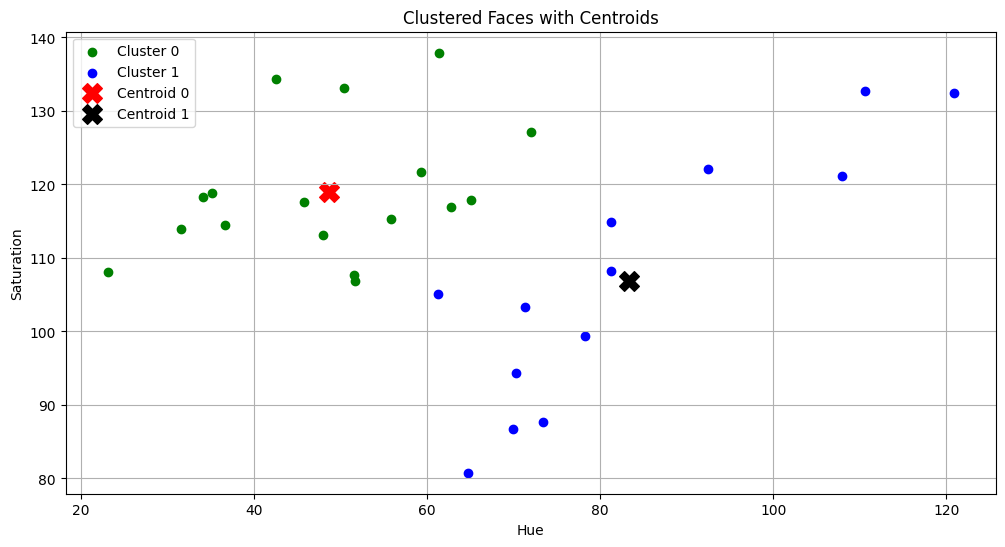

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='black', marker='X', s=200, label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces with Centroids")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread(r"C:\Users\hp\Desktop\Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
gray_template = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(gray_template, 1.05, 4)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Template Face Detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

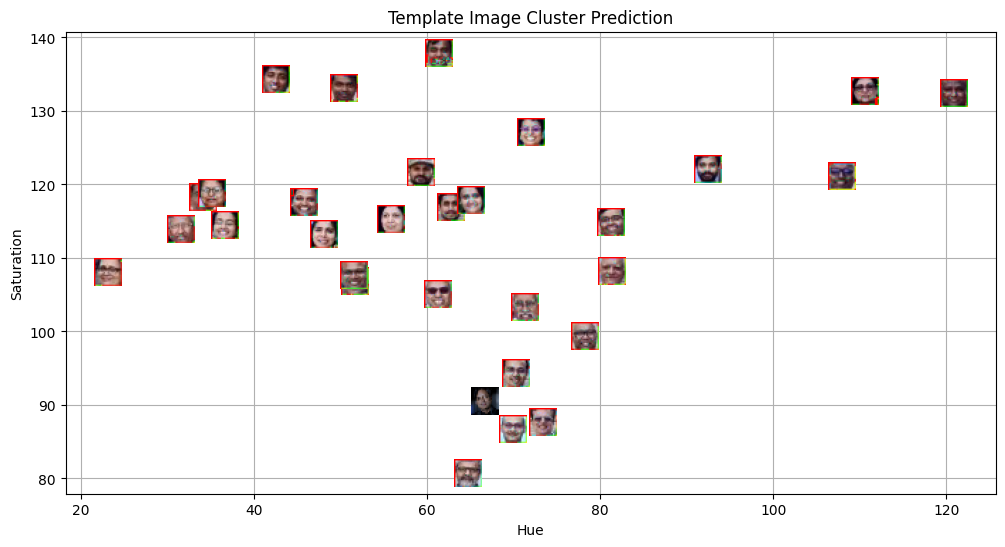

In [17]:
# Convert the template image to HSV color space and store it in template_hsv
# Convert template to HSV
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Mean hue and saturation
template_hue = template_hsv[:, :, 0].mean()
template_saturation = template_hsv[:, :, 1].mean()

# Shape must be (1, 2)
template_features = np.array([[template_hue, template_saturation]])

# Predict cluster
template_label = kmeans.predict(template_features)[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Image Cluster Prediction")
plt.grid(True)
plt.show()

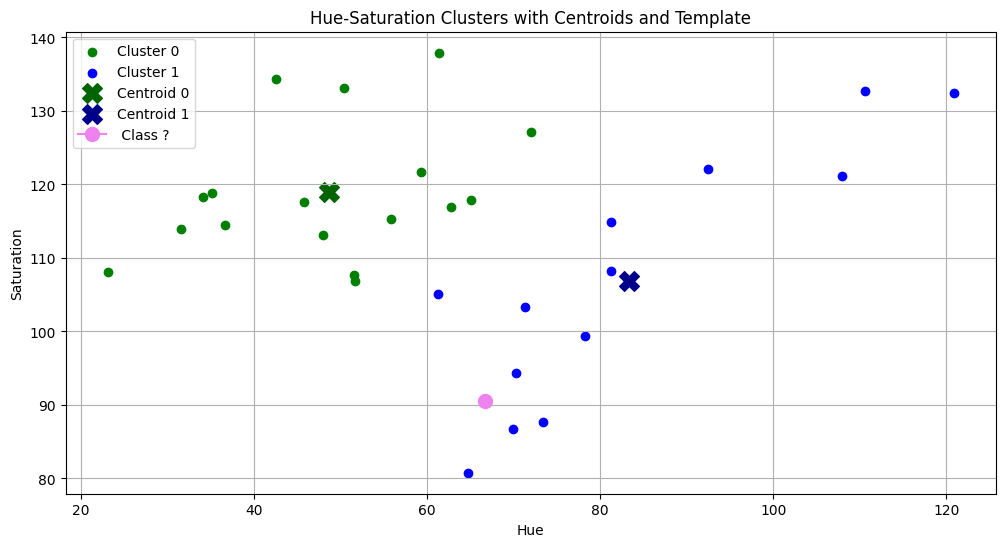

In [18]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], c='darkgreen', marker='X', s=200, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='darkblue', marker='X', s=200, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Hue-Saturation Clusters with Centroids and Template')
plt.legend()
plt.grid(True)
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

In [ ]:
# ANS1- Euclidean, Manhattan, Minkowski, Chebyshev, Cosine, Hamming etc.

In [ ]:
# ANS2 - Distance-based classification algorithms,are widely used in real-world 
# applications. They power recommendation systems (Netflix, Amazon) by 
# finding users or items with similar preferences, image recognition 
# by comparing feature vectors, and medical diagnosis by matching patient data to historical records.
# They also help in fraud detection by flagging unusual transactions, spam filtering and text 
# classification

In [ ]:
# ANS3 - 
# Euclidean Distance
#Use: Continuous numeric data.
#Straight-line distance between two points in n-dimensional space

#Manhattan Distance
#Use: Grid-like movements or independent features.
#Distance measured along axes, like moving through city streets.

#Minkowski Distance
#Use: Generalization of Euclidean (p=1,p=2)
#Adjustable metric depending on p

#Cosine Distance
#Use: Text data, high-dimensional sparse vectors.
#Measures angle between vectors, ignoring magnitude.

In [ ]:
# ANS4 - 
# Cross-validation plays a critical role in evaluating and improving model performance by 
# providing a more reliable estimate of how a model will perform on unseen data. 
# Instead of training and testing a model on a single split of data—which can be biased,
# cross-validation splits the dataset into multiple folds.
# For example, in k-fold cross-validation, the dataset is divided into k equal parts. 
# The model is trained on k-1 folds and tested on the remaining fold.

In [ ]:
#In k-Nearest Neighbors (k-NN), bias and variance describe how the choice of k affects model error. 
# A low k makes the model highly sensitive to individual training points, 
# leading to high variance and potential overfitting, as it captures noise as patterns. 
# A high k averages over many neighbors, producing high bias and underfitting, 
# since the model may miss local patterns in the data. The key is to choose a k that balances 
# bias and variance, achieving good generalization to unseen data. 